In [139]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [140]:
df=pd.read_csv('https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [141]:
df.shape

(1470, 35)

In [142]:
df=df.head(200)

In [143]:
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [144]:
#Get the number of rows and cols
df.shape

(200, 35)

In [145]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [146]:
#Get a count of the empty values for each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [147]:
#Check for any missing /null values in the data
df.isnull().values.any()

False

In [148]:
#view some statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.0,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,37.425000,850.785000,9.195000,2.825000,1.0,133.420000,2.645000,64.555000,2.720000,2.005000,...,2.870000,80.0,0.705000,11.29500,2.74000,2.740000,7.105000,4.465000,2.220000,4.225000
std,9.766334,409.458128,8.162728,1.024511,0.0,79.317716,1.041344,21.021572,0.695716,1.123068,...,1.095032,0.0,0.831524,8.00929,1.27299,0.696293,6.787068,4.026143,3.340267,3.684052
min,19.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,529.500000,2.000000,2.000000,1.0,63.750000,2.000000,47.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.00000,2.00000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,35.500000,855.000000,7.000000,3.000000,1.0,132.500000,3.000000,64.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.00000,3.00000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1218.250000,14.000000,4.000000,1.0,201.250000,3.000000,82.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.00000,3.00000,3.000000,9.250000,7.000000,2.000000,7.000000
max,59.000000,1496.000000,29.000000,5.000000,1.0,273.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.00000,6.00000,4.000000,40.000000,18.000000,15.000000,17.000000


In [149]:
#Get a count of the number of employee that stayed and left the company
df['Attrition'].value_counts()

No     170
Yes     30
Name: Attrition, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

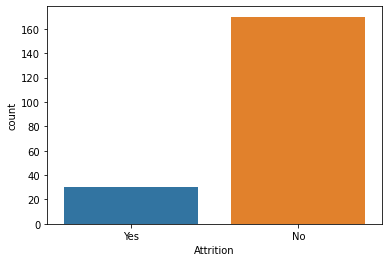

In [150]:
#visualize the number of employees that stayed and left the company
sns.countplot(df['Attrition'])

In [151]:
#This is the percentage if we just guessed no 
(170-30)/170

0.8235294117647058

<AxesSubplot:xlabel='Age', ylabel='count'>

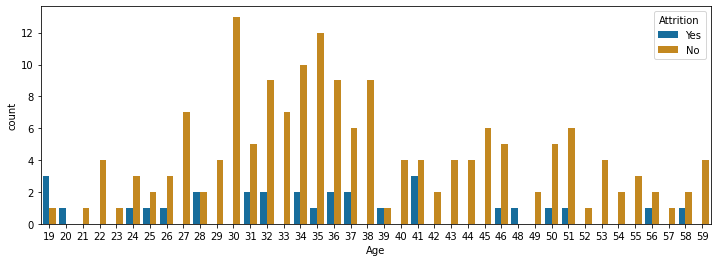

In [152]:
#Show the number of employees that left and stayed by their age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

In [153]:
#print tall of the data types and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+': '+str(df[column].unique()))
        print(df[column].value_counts())
        print('_____________________________________')
              

Attrition: ['Yes' 'No']
No     170
Yes     30
Name: Attrition, dtype: int64
_____________________________________
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        146
Travel_Frequently     36
Non-Travel            18
Name: BusinessTravel, dtype: int64
_____________________________________
Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    143
Sales                      51
Human Resources             6
Name: Department, dtype: int64
_____________________________________
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       84
Medical             68
Marketing           21
Technical Degree    14
Other                9
Human Resources      4
Name: EducationField, dtype: int64
_____________________________________
Gender: ['Female' 'Male']
Male      118
Female     82
Name: Gender, dtype: int64
_____________________________________
JobRole: ['Sale

In [154]:
#Remove some useles columns
df=df.drop('StandardHours',axis=1)

In [155]:
df=df.drop('EmployeeNumber',axis=1)

In [156]:
df=df.drop('EmployeeCount',axis=1)

In [157]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,37,No,Travel_Rarely,290,Research & Development,21,3,Life Sciences,2,Male,...,3,1,1,8,3,2,8,7,1,7
196,35,No,Travel_Frequently,138,Research & Development,2,3,Medical,2,Female,...,3,4,0,10,5,3,6,2,1,2
197,42,No,Non-Travel,926,Research & Development,21,2,Medical,3,Female,...,3,2,1,11,5,3,5,3,0,2
198,38,No,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,4,Male,...,3,2,0,14,3,3,1,0,0,0


In [158]:
#get the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.045956,-0.027772,0.251050,-0.074524,0.014755,0.060497,0.519808,-0.065023,0.509927,...,0.024643,0.022108,0.054500,0.698117,-0.018148,-0.102642,0.336456,0.227798,0.197372,0.178615
DailyRate,0.045956,1.000000,-0.021080,-0.062405,-0.015937,-0.108546,-0.034293,0.035485,-0.038791,0.031366,...,0.029418,0.009744,0.026350,-0.001582,-0.024181,-0.100046,-0.052961,0.036972,0.035251,-0.071824
DistanceFromHome,-0.027772,-0.021080,1.000000,-0.034356,0.039517,0.026279,0.133545,-0.093842,0.046395,-0.077578,...,-0.022997,0.032646,-0.003328,-0.050845,-0.016858,-0.119235,0.033824,0.011906,0.013900,0.077574
Education,0.251050,-0.062405,-0.034356,1.000000,-0.034973,-0.113298,-0.005640,0.206033,-0.099436,0.193746,...,0.053890,-0.056214,-0.108093,0.269656,0.049704,-0.007749,0.184049,0.186729,0.097943,0.176908
EnvironmentSatisfaction,-0.074524,-0.015937,0.039517,-0.034973,1.000000,-0.017812,0.097939,-0.088708,0.056213,-0.100699,...,-0.137497,-0.009827,0.093173,-0.076551,0.039955,0.010673,-0.061534,-0.070698,-0.055447,-0.162456
HourlyRate,0.014755,-0.108546,0.026279,-0.113298,-0.017812,1.000000,0.035762,-0.117612,-0.037686,-0.113855,...,0.030260,-0.031560,0.097382,-0.069355,0.045042,-0.036783,-0.042077,-0.057688,-0.055922,-0.050545
JobInvolvement,0.060497,-0.034293,0.133545,-0.005640,0.097939,0.035762,1.000000,-0.056082,-0.078893,-0.040343,...,-0.086987,-0.001847,0.082347,-0.066266,0.025193,-0.057676,-0.059724,-0.034015,-0.042556,-0.069405
JobLevel,0.519808,0.035485,-0.093842,0.206033,-0.088708,-0.117612,-0.056082,1.000000,0.021515,0.949795,...,-0.100114,0.057737,-0.019937,0.783634,-0.034235,-0.004755,0.576786,0.498480,0.477925,0.469757
JobSatisfaction,-0.065023,-0.038791,0.046395,-0.099436,0.056213,-0.037686,-0.078893,0.021515,1.000000,0.008064,...,-0.068541,0.008523,-0.053173,-0.022168,-0.086959,-0.019640,0.031878,-0.005290,-0.019198,-0.005831
MonthlyIncome,0.509927,0.031366,-0.077578,0.193746,-0.100699,-0.113855,-0.040343,0.949795,0.008064,1.000000,...,-0.104906,0.031135,-0.038391,0.739492,-0.022252,0.006453,0.549830,0.462757,0.473925,0.433605


<AxesSubplot:>

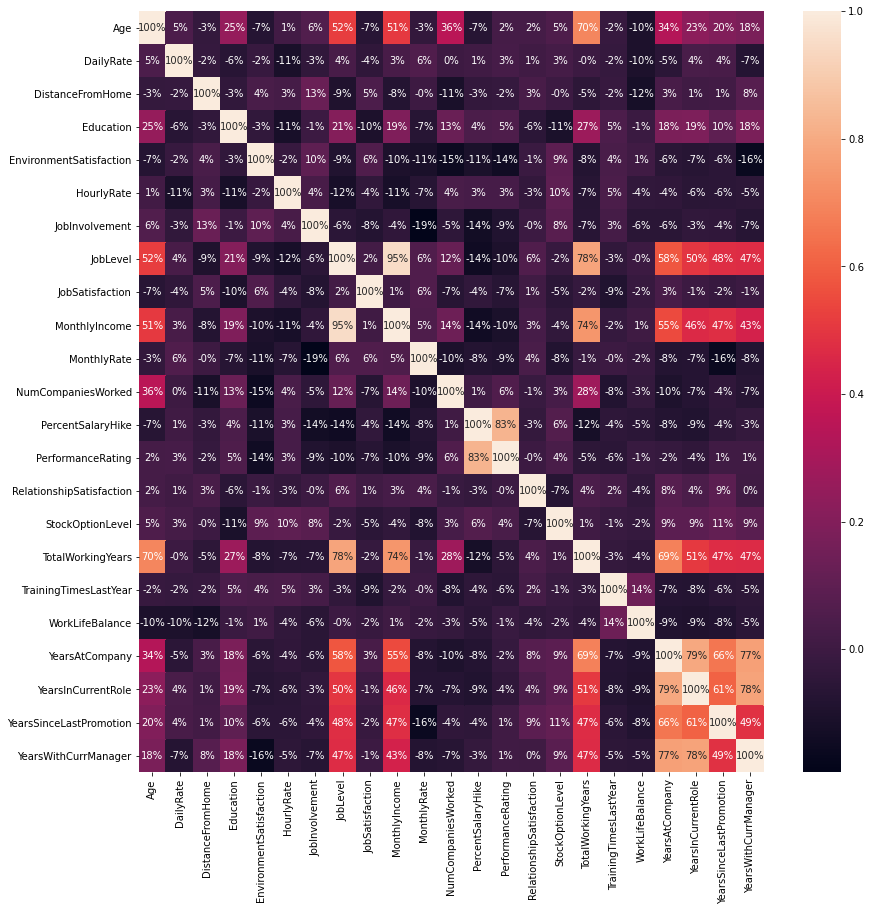

In [159]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [160]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-160-064f161cfc35>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [161]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,22,1,2,118,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,29,0,1,17,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,18,1,2,165,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,14,0,1,168,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,8,0,2,52,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,18,0,2,19,1,20,2,1,1,1,...,0,0,1,8,3,1,8,7,1,7
196,16,0,1,6,1,1,2,3,1,0,...,0,3,0,10,5,2,6,2,1,2
197,23,0,0,99,1,20,1,3,2,0,...,0,1,1,11,5,2,5,3,0,2
198,19,0,2,143,1,1,3,1,3,1,...,0,1,0,14,3,2,1,0,0,0


In [162]:
#Create a new column
df['Age_years']=df['Age']

In [163]:
#Drop the age column
df=df.drop('Age',axis=1)

In [164]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,118,2,0,1,1,1,0,58,...,0,0,8,0,0,6,4,0,5,22
1,0,1,17,1,7,0,1,2,1,30,...,3,1,10,3,2,10,7,1,7,29
2,1,2,165,1,1,1,4,3,1,56,...,1,0,7,3,2,0,0,0,0,18
3,0,1,168,1,2,3,1,3,0,25,...,2,0,8,3,2,8,7,3,0,14
4,0,2,52,1,1,0,3,0,1,9,...,3,1,6,3,2,2,2,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,2,19,1,20,2,1,1,1,34,...,0,1,8,3,1,8,7,1,7,18
196,0,1,6,1,1,2,3,1,0,7,...,3,0,10,5,2,6,2,1,2,16
197,0,0,99,1,20,1,3,2,0,6,...,1,1,11,5,2,5,3,0,2,23
198,0,2,143,1,1,3,1,3,1,53,...,1,0,14,3,2,1,0,0,0,19


In [165]:
#Split the data 
x=df.iloc[:,1:df.shape[1]].values
y=df.iloc[:,0].values

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [170]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [171]:
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [172]:
#Get the accuracy on the training data set
forest.score(x_train,y_train)

0.95625

In [173]:
#Show the confusion matrix and accuracy score for the model on the test dt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,forest.predict(x_test))

In [177]:
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print(cm)
print('Model Testing Acuracy={}'.format(tp+tn)/(tp+tn+fn+fp))

[[33  0]
 [ 6  1]]


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''